In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#to be changed as needed
data_dir = '//content/gdrive/My Drive/tbip_BSP/data/'
plot_dir = '/content/gdrive/My Drive/tbip_BSP/data/figures/'

output = 'output300000' 

In [ ]:
#for grayscale images
def grey_color_func(word, font_size, position, orientation, random_state=None,
                        **kwargs):
            return "hsl(0, 100%, 0%)"

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


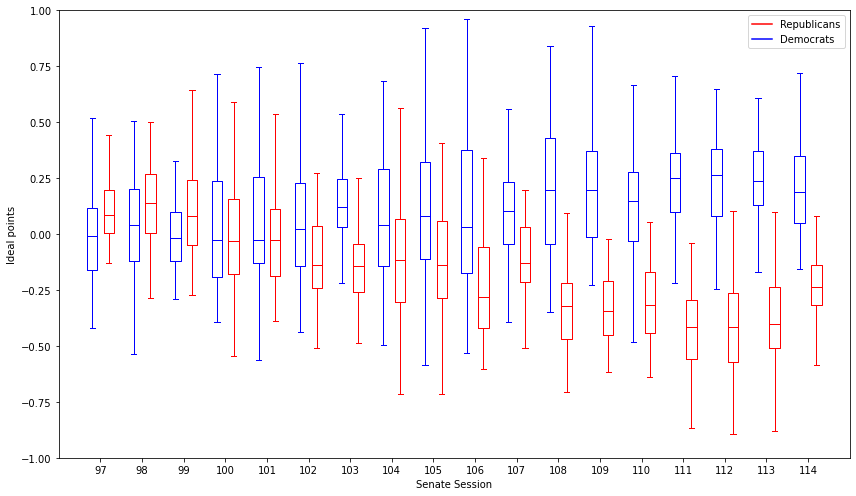

In [ ]:
#ideal points over sessions

Rep_mega = []
Dem_mega = []

for i in range(97, 115):
    input_dir = os.path.join(data_dir, str(i), 'input')
    tbip_dir = os.path.join(data_dir, str(i), output)
    author_map = np.loadtxt(os.path.join(input_dir, 'author_map.txt'), 
                            dtype=str, 
                            delimiter='\n', 
                            comments='//')
    ideal_point_mean = np.load(os.path.join(tbip_dir, "ideal_point_mean.npy"))
    speakers = pd.DataFrame(columns=['speaker_name', 'ideal_point']) 
    #create empty df
    speakers['speaker_name'] = author_map
    speakers['ideal_point'] = ideal_point_mean

    dems = [] #Democrat Senators

    for j in range(len(speakers)):
        if(speakers['speaker_name'][j].endswith(('(D)'))):
            dems.append(speakers['speaker_name'][j])

    reps = [] #Republican Senators

    for j in range(len(speakers)):
        if(speakers['speaker_name'][j].endswith(('(R)'))):
            reps.append(speakers['speaker_name'][j])

    ideal_point_dict = {speakers.speaker_name[k] : speakers.ideal_point[k] for k in 
                       range(len(speakers.ideal_point))}

    spk = []

    for j in range(len(speakers)):
          spk.append(speakers['speaker_name'][j])

    ideals = []

    for j in spk:
        ideals.append(ideal_point_dict[j])

    D_ideals = []

    for j in dems:
        D_ideals.append(ideal_point_dict[j])

    R_ideals = []

    for j in reps:
        R_ideals.append(ideal_point_dict[j])

    Rs_ideals = R_ideals
    Ds_ideals = D_ideals
    
    Rep_mega.append(R_ideals)
    Dem_mega.append(D_ideals)

data_d = []
data_r = []

for i in range(0, 18):
    data_d.append(Dem_mega[i])
    
for i in range(0, 18):
    data_r.append(Rep_mega[i])

ticks = ['97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
        '110', '111', '112', '113', '114']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(12, 7))

bpl = plt.boxplot(data_d, positions=np.array(range(len(data_d)))*2.0-0.4, sym='', widths=0.5)
bpr = plt.boxplot(data_r, positions=np.array(range(len(data_r)))*2.0+0.4, sym='', widths=0.5)
set_box_color(bpl, '#0000FF') #blue dems
set_box_color(bpr, '#FF0000') #red Rep

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#FF0000', label='Republicans')
plt.plot([], c='#0000FF', label='Democrats')
plt.legend()

plt.xticks(range(0, len(ticks)*2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-1, 1)
plt.ylabel('Ideal points')
plt.xlabel('Senate Session')
#plt.title('Ideal points of Senators with theta, beta and eta initialization')
#plt.savefig(os.path.join(plot_dir, 'ideal_points_boxplot.pdf'), bbox_inches='tight') #uncomment to save figure
plt.tight_layout()

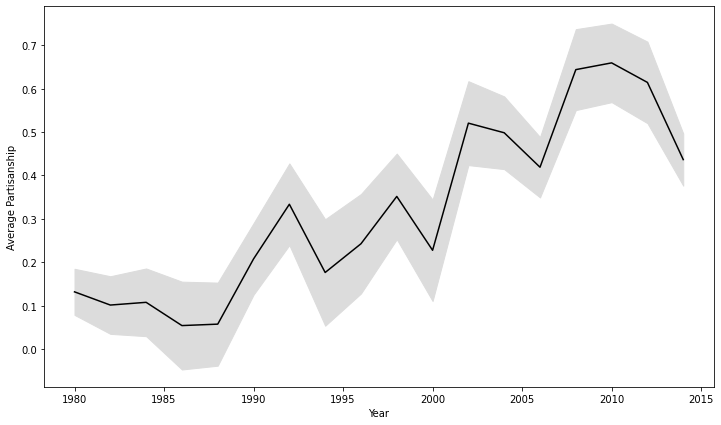

In [ ]:
#Average partisanship plot
#Defined as absolute difference between means of ideal points for R and D members of each session

upper_interval = []
lower_interval = []

for i in range(0, 18):
  ci_u = np.abs(np.mean(Dem_mega[i]) - np.mean(Rep_mega[i])) + 1.96*(np.sqrt((np.var(Rep_mega[i])/len(Rep_mega[i])) + (np.var(Rep_mega[i])/len(Rep_mega[i]))))
  upper_interval.append(ci_u)
  ci_d = np.abs(np.mean(Dem_mega[i]) - np.mean(Rep_mega[i])) - 1.96*(np.sqrt((np.var(Rep_mega[i])/len(Rep_mega[i])) + (np.var(Rep_mega[i])/len(Rep_mega[i]))))
  lower_interval.append(ci_d)

partisanship = []
for i in range(0, 18):
    partisanship.append(np.abs(np.mean(Dem_mega[i]) - np.mean(Rep_mega[i])))

plt.figure(figsize=(12, 7))
plt.ylabel('Average Partisanship')
plt.xlabel('Year')
xi = np.arange(1980, 2016, 2)
#xi_2 = xi = np.arange(97, 114, 1)
plt.plot(xi, partisanship, linestyle='-', color='black')
plt.fill_between(xi, upper_interval, lower_interval, color='gainsboro')
#plt.title('Difference in Ideal Points (with 95% confidence intervals)')
#plt.legend() 
#plt.savefig(os.path.join(plot_dir, 'avg_partisanship_interval.pdf'), bbox_inches='tight') #uncomment to save
plt.show()

In [ ]:
#saving partisanship
p = pd.DataFrame(columns = ['session', 'partisanship'])
#p['session'] = sessions
p['session'] = ['97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114']
p['partisanship'] = part
p.to_csv(os.path.join(data_dir, 'partisanship_by_session.csv'), index=False)

NameError: ignored

In [ ]:
#Topic propagation heatmaps

neutral_topics = defaultdict(list) #dicitionary style list
positive_topics = defaultdict(list)
negative_topics = defaultdict(list)

for i in range(97, 115):
    tbip_path = os.path.join(data_dir, str(i), output)
    neutral_mean = np.load(os.path.join(tbip_path, "neutral_topic_mean.npy")) #log values
    positive_mean = np.load(os.path.join(tbip_path, 'positive_topic_mean.npy')) #log values
    negative_mean = np.load(os.path.join(tbip_path, 'negative_topic_mean.npy'))
    ideals = np.load(os.path.join(tbip_path, 'ideal_point_mean.npy'))
    t_quantile = np.quantile(ideals, 0.1)
    n_quantile = np.quantile(ideals, 0.9)
    neutral_topics[i] = np.exp(neutral_mean) #using neutral/negative/positive mean npy files only 
    #positive_topics[i] = t_quantile * np.exp(neutral_mean) #10th quantile x beta
    #negative_topics[i] = n_quantile * np.exp(neutral_mean) #90th quantile x beta
    positive_topics[i] = np.exp(positive_mean)
    negative_topics[i] = np.exp(negative_mean)
    #all values with exp

In [ ]:
order = [1, 14, 19, 15, 20, 17, 6, 16, 7, 22, 25, 23, 
         10, 4, 21, 18, 5, 13, 2, 8, 12, 9, 11, 24, 3] #order of neutral topics

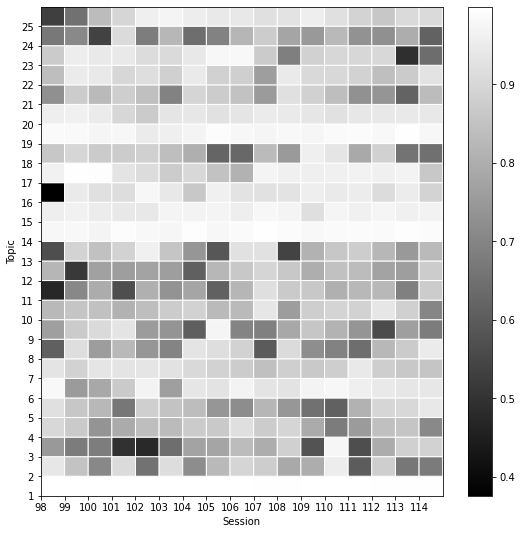

In [ ]:
#Positive topics
import matplotlib.cm as cm

sess_topics_cs = defaultdict(list) #dicitionary style list to store sessionwise cosine distances between topics

for s in range(97, 114):
    topic_cs = np.empty([25, 25]) #empty numpy array to fill for each session, shape 25x25
    sess1 = s #sessions
    sess2 = s+1

    for i in range(0, 25):
        t1 = neutral_topics[sess1][i] #topic 1
        for j in range(0, 25):
            t2 = neutral_topics[sess2][j] #topic 2

            topic_cs[i][j] = 1 - distance.cosine(t1, t2) #cosine similarity between topics 1 and 2
        sess_topics_cs[s].append(topic_cs[i][i]) #saving only the diagonal from the 25x25 array
        
y = []
for i in range(97, 114):
    y.append(sess_topics_cs[i]) #a list of lists, with all diagonal values

arr_y = np.array(y) #list to array, shape 17x25
arr_y = np.transpose(arr_y) #transpose, shape 25x17

#sorting topics by row means to figure out which topic changes the most
topic_means = pd.DataFrame() #empty datafram
topic_means['mean'] = np.mean(arr_y, axis = 1) #mean of each row
topic_means['topic'] = list(range(25)) #list 0-25
#topic_means = topic_means.sort_values('mean') #sort as per mean of each row
y_ticks = (topic_means['topic'] + 1).tolist() #y axis ticks as per sorted topics 

y2 = []
for i in topic_means['topic']:
    y2.append(arr_y[i]) #sorted rows from sorted dataframe

arr_y2 = np.array(y2) #sorted rows 

#arr_y2 = np.array(arr_y) #unsorted rows 

x_ticks = list(range(98, 115))
y_ticks = list(range(1, 26))

plt.figure(figsize=(9,9))
#plt.imshow(arr_y2, interpolation='nearest')
plt.grid(False)
plt.ylabel('Topic')
plt.xlabel('Session')
#plt.title('Cosine similarities of Positive topics')
plt.xticks(range(0, len(x_ticks)*1, 1), x_ticks)
plt.xlim(0, len(x_ticks))
plt.yticks(range(0, len(y_ticks)*1, 1), y_ticks)
plt.ylim(0, len(y_ticks))
im = plt.pcolormesh(arr_y2, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
plt.colorbar(im)
#plt.savefig(os.path.join(plot_dir, 'sorted_positive_topics_cs.pdf'), bbox_inches='tight') #uncomment to save 
plt.show()
#bright = closer, dark = farther

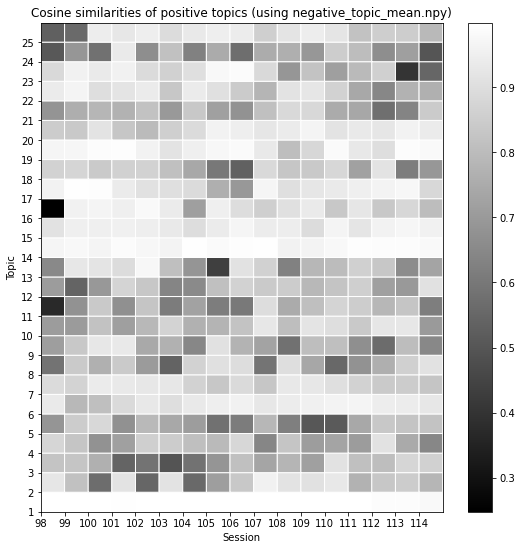

In [ ]:
#COPY #COPY
import matplotlib.cm as cm

sess_topics_cs = defaultdict(list) #dicitionary style list to store sessionwise cosine distances between topics

for s in range(97, 114):
    topic_cs = np.empty([25, 25]) #empty numpy array to fill for each session, shape 25x25
    sess1 = s #sessions
    sess2 = s+1

    for i in range(0, 25):
        t1 = negative_topics[sess1][i] #topic 1
        for j in range(0, 25):
            t2 = negative_topics[sess2][j] #topic 2

            topic_cs[i][j] = 1 - distance.cosine(t1, t2) #cosine similarity between topics 1 and 2
        sess_topics_cs[s].append(topic_cs[i][i]) #saving only the diagonal from the 25x25 array
        
y = []
for i in range(97, 114):
    y.append(sess_topics_cs[i]) #a list of lists, with all diagonal values

arr_y = np.array(y) #list to array, shape 17x25
arr_y = np.transpose(arr_y) #transpose, shape 25x17

#sorting topics by row means to figure out which topic changes the most
topic_means = pd.DataFrame() #empty datafram
topic_means['mean'] = np.mean(arr_y, axis = 1) #mean of each row
topic_means['topic'] = list(range(25)) #list 0-25
#topic_means = topic_means.sort_values('mean') #sort as per mean of each row
y_ticks = (topic_means['topic'] + 1).tolist() #y axis ticks as per sorted topics 

y2 = []
for i in topic_means['topic']:
    y2.append(arr_y[i]) #sorted rows from sorted dataframe

arr_y2 = np.array(y2) #sorted rows 

#arr_y2 = np.array(arr_y) #unsorted rows 

x_ticks = list(range(98, 115))
y_ticks = list(range(1, 26))

plt.figure(figsize=(9,9))
#plt.imshow(arr_y2, interpolation='nearest')
plt.grid(False)
plt.ylabel('Topic')
plt.xlabel('Session')
plt.title('Cosine similarities of positive topics (using negative_topic_mean.npy)')
plt.xticks(range(0, len(x_ticks)*1, 1), x_ticks)
plt.xlim(0, len(x_ticks))
plt.yticks(range(0, len(y_ticks)*1, 1), y_ticks)
plt.ylim(0, len(y_ticks))
im = plt.pcolormesh(arr_y2, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
plt.colorbar(im)
#plt.savefig(os.path.join(plot_dir, 'sorted_positive_topics_cs.pdf'), bbox_inches='tight') #uncomment to save 
plt.show()
#bright = closer, dark = farther

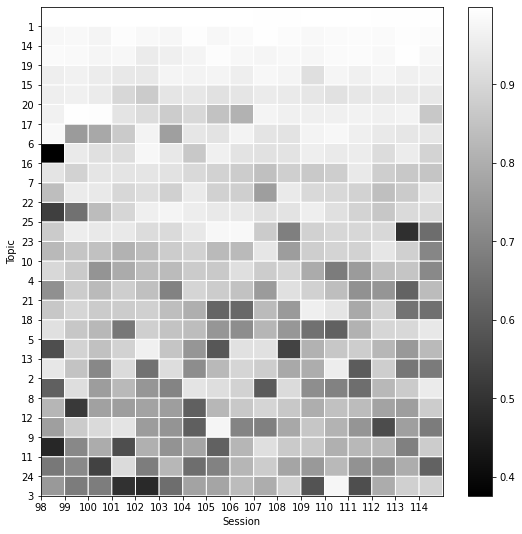

In [ ]:
#Neutral topics 

sess_topics_cs = defaultdict(list) #dicitionary style list to store sessionwise cosine distances between topics

for s in range(97, 114):
    topic_cs = np.empty([25, 25]) #empty numpy array to fill for each session, shape 25x25
    sess1 = s #sessions
    sess2 = s+1

    for i in range(0, 25):
        t1 = neutral_topics[sess1][i] #topic 1
        for j in range(0, 25):
            t2 = neutral_topics[sess2][j] #topic 2

            topic_cs[i][j] = 1 - distance.cosine(t1, t2) #cosine similarity between topics 1 and 2
        sess_topics_cs[s].append(topic_cs[i][i]) #saving only the diagonal from the 25x25 array
        
y = []
for i in range(97, 114):
    y.append(sess_topics_cs[i]) #a list of lists, with all diagonal values

arr_y = np.array(y) #list to array, shape 17x25
arr_y = np.transpose(arr_y) #transpose, shape 25x17

#sorting topics by row means to figure out which topic changes the most
topic_means = pd.DataFrame() #empty datafram
topic_means['mean'] = np.mean(arr_y, axis = 1) #mean of each row
topic_means['topic'] = list(range(25)) #list 0-25
topic_means = topic_means.sort_values('mean') #sort as per mean of each row
y_ticks = (topic_means['topic'] + 1).tolist() #y axis ticks as per sorted topics 

y2 = []
for i in topic_means['topic']:
    y2.append(arr_y[i]) #sorted rows from sorted dataframe

arr_y2 = np.array(y2) #sorted rows 

x_ticks = ['98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
        '110', '111', '112', '113', '114']
plt.figure(figsize=(9,9))
#plt.imshow(arr_y2, interpolation='nearest')
plt.grid(False)
plt.ylabel('Topic')
plt.xlabel('Session')
#plt.title('Cosine similarities of Neutral topics')
plt.xticks(range(0, len(x_ticks)*1, 1), x_ticks)
plt.xlim(0, len(x_ticks))
plt.yticks(range(0, len(y_ticks)*1, 1), y_ticks)
plt.ylim(0, len(y_ticks))
im = plt.pcolormesh(arr_y2, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
plt.colorbar(im)
#plt.savefig(os.path.join(plot_dir, 'sorted_neutral_topics_cs.pdf'), bbox_inches='tight') #uncomment to save
plt.show()
#bright = closer, dark = farther

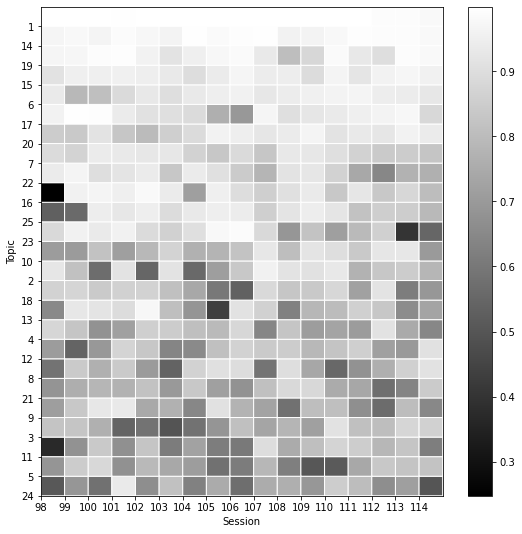

In [ ]:
#Negative topics

sess_topics_cs = defaultdict(list) #dicitionary style list to store sessionwise cosine distances between topics

for s in range(97, 114):
    topic_cs = np.empty([25, 25]) #empty numpy array to fill for each session, shape 25x25
    sess1 = s #sessions
    sess2 = s+1

    for i in range(0, 25):
        t1 = negative_topics[sess1][i] #topic 1
        for j in range(0, 25):
            t2 = negative_topics[sess2][j] #topic 2

            topic_cs[i][j] = 1 - distance.cosine(t1, t2) #cosine similarity between topics 1 and 2
        sess_topics_cs[s].append(topic_cs[i][i]) #saving only the diagonal from the 25x25 array
        
y = []
for i in range(97, 114):
    y.append(sess_topics_cs[i]) #a list of lists, with all diagonal values

arr_y = np.array(y) #list to array, shape 17x25
arr_y = np.transpose(arr_y) #transpose, shape 25x17

#sorting topics by row means to figure out which topic changes the most
topic_means = pd.DataFrame() #empty datafram
topic_means['mean'] = np.mean(arr_y, axis = 1) #mean of each row
topic_means['topic'] = list(range(25)) #list 0-25
topic_means = topic_means.sort_values('mean') #sort as per mean of each row
y_ticks = (topic_means['topic'] + 1).tolist() #y axis ticks as per sorted topics 

y2 = []
for i in topic_means['topic']:
    y2.append(arr_y[i]) #sorted rows from sorted dataframe

arr_y2 = np.array(y2) #sorted rows 

x_ticks = ['98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
        '110', '111', '112', '113', '114']
plt.figure(figsize=(9,9))
#plt.imshow(arr_y2, interpolation='nearest')
plt.grid(False)
plt.ylabel('Topic')
plt.xlabel('Session')
#plt.title('Cosine similarities of Negative topics')
plt.xticks(range(0, len(x_ticks)*1, 1), x_ticks)
plt.xlim(0, len(x_ticks))
plt.yticks(range(0, len(y_ticks)*1, 1), y_ticks)
plt.ylim(0, len(y_ticks))
im = plt.pcolormesh(arr_y2, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
plt.colorbar(im)
#plt.savefig(os.path.join(plot_dir, 'sorted_negative_topics_cs.pdf'), bbox_inches='tight') #uncomment to save
plt.show()
#bright = closer, dark = farther

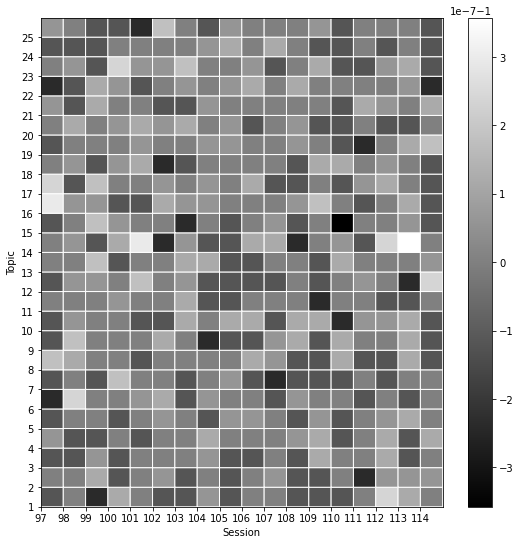

In [ ]:
neutral_topics = defaultdict(list) #dicitionary style list
positive_topics = defaultdict(list)
negative_topics = defaultdict(list)

for i in range(97, 115):
    tbip_path = os.path.join(data_dir, str(i), output)
    neutral_mean = np.load(os.path.join(tbip_path, "neutral_topic_mean.npy"))
    positive_mean = np.load(os.path.join(tbip_path, 'positive_topic_mean.npy'))
    negative_mean = np.load(os.path.join(tbip_path, 'negative_topic_mean.npy'))
    ideals = np.load(os.path.join(tbip_path, 'ideal_point_mean.npy'))
    t_quantile = np.quantile(ideals, 0.1) #10th quantile of ideal points
    n_quantile = np.quantile(ideals, 0.9) #90th quantile of ideal points
    neutral_topics[i] = np.exp(neutral_mean) 
    positive_topics[i] = t_quantile * np.exp(neutral_mean) #10th quantile x beta
    negative_topics[i] = n_quantile * np.exp(neutral_mean) #90th quantile x beta
    #positive_topics[i] = np.exp(positive_mean)
    #negative_topics[i] = np.exp(negative_mean)
    #all values with expneutral_topics = defaultdict(list) #dicitionary style list

col = ['97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
        '110', '111', '112', '113', '114'] #topics

cs_pn = pd.DataFrame(columns = col)

for topic in range(0, 25):
    similarity = []
    for sess in range(97, 115):
        t1 = positive_topics[sess][topic]
        t2 = negative_topics[sess][topic]
        similarity.append(1 - distance.cosine(t1, t2)) #cosine similarity between +ve and -ve ideal topics of session
    cs_pn.loc[topic] = similarity
    
y_ticks = list(range(1, 26))
x_ticks = list(range(97, 115))
plt.figure(figsize=(9,9))
#plt.imshow(arr_y2, interpolation='nearest')
plt.grid(False)
plt.ylabel('Topic')
plt.xlabel('Session')
#plt.title('Cosine similarities of Positive topics')
plt.xticks(range(0, len(x_ticks), 1), x_ticks)
plt.xlim(0, len(x_ticks))
plt.yticks(range(0, len(y_ticks), 1), y_ticks)
plt.ylim(0, len(y_ticks))
im = plt.pcolormesh(cs_pn, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
plt.colorbar(im)
#plt.savefig(os.path.join(plot_path, 'np_topics_cs_105.pdf'), bbox_inches='tight')
plt.show()
#cosine similarities between positive and negative topics
#brighter = closer; darker = farther

In [ ]:
#Wordclouds for a specific session and topic as needed

#session
sess = 97
#some sample topics to try
#topic = 17 #nucelar
#topic = 14 #healthcare
#topic = 11 #taxes
#topic = 0 #immigration
#topic = 7 #terrorism
topic = 24

path = data_dir
eta_p = np.load(os.path.join(path, str(sess), output, 'positive_topic_mean.npy')) #positive
eta_n = np.load(os.path.join(path, str(sess), output, 'negative_topic_mean.npy')) #negative
ideals = np.load(os.path.join(path, str(sess), output, 'ideal_point_mean.npy'))
beta = np.load(os.path.join(path, str(sess), output, 'neutral_topic_mean.npy')) #neutral 
ideological_topic_loc = np.load(os.path.join(path, str(sess), output, 'ideological_topic_loc.npy'))

author_map = pd.read_csv(os.path.join(path, str(sess), 'input', 'author_map.txt'), header = None)
vocab = pd.read_csv(os.path.join(path, str(sess) , 'input','vocabulary.txt'), header = None) 
topic_terms = pd.DataFrame(columns = ['index', 'bigram', 't', 'n'])
topic_terms['index'] = np.arange(len(vocab))
topic_terms['bigram'] = vocab[0]

t_quantile = np.quantile(ideals, 0.1) #10th quantile ideal
n_quantile = np.quantile(ideals, 0.9) #90th quantile ideal

for i in range(0, len(vocab)):
    topic_terms['t'][i] = t_quantile * ideological_topic_loc[topic, i] #decreasing order since positive value increases count
    topic_terms['n'][i] = n_quantile * ideological_topic_loc[topic, i] #ascending

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Republicans
#sported by tenth quantile ideal
#negative x negative, most positive increases Poisson rate of word count
#print t_n to see list of bigrams and their weights as a dataframe

t_n = topic_terms.sort_values('t', ascending  = False)[0:20]
df_n = pd.DataFrame(columns = ['bigram', 't'])
df_n['bigram'] = t_n['bigram']
df_n['t'] = t_n['t']
dictionary = pd.Series(df_n.t.values, index = df_n.bigram).to_dict()
#dictionary
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(dictionary)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
                   interpolation="bilinear")
plt.axis("off")
plt.title('Sess ' +str(sess) +' Negative ideal point terms topic '+str(topic+1))
#naming convention <session>_<topic key>_<negative> for Republicans
#uncomment to save
#plt.savefig(os.path.join(plot_dir, str(sess)+'_topic'+str(topic+1)+'.pdf'), bbox_inches='tight', dpi = 150) #uncomment to save
#increase dpi value for higher resolution
plt.show()

In [ ]:
#Democrats
#sorted by ninetieth quantile ideal
#positive x positive, most positive increases Poisson rate of word count
#print t_p to see list of bigrams and their weights as a dataframe
t_p = topic_terms.sort_values('n', ascending  = False)[0:20]
df_p = pd.DataFrame(columns = ['bigram', 'n'])
df_p['bigram'] = t_p['bigram']
df_p['n'] = t_p['n']
dictionary2 = pd.Series(df_p.n.values, index = df_p.bigram).to_dict()
#dictionary
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(dictionary2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#uncomment to save
#plt.savefig(os.path.join(plot_dir, '113_terrorism_positive.pdf'), bbox_inches='tight')
plt.show()

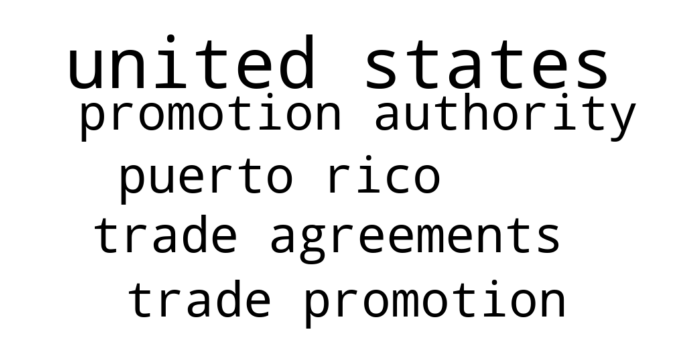

In [ ]:
#wordclouds

for sess in range(114, 115):
    ideals = np.load(os.path.join(data_dir, str(sess), output, 'ideal_point_mean.npy'))
    vocab = pd.read_csv(os.path.join(data_dir, str(sess) , 'input','vocabulary.txt'), header = None)
    beta = np.load(os.path.join(data_dir, str(sess), output, 'neutral_topic_mean.npy')) #neutral 
    beta = np.exp(beta)
    t_quantile = np.quantile(ideals, 0.1) #10th quantile ideal point
    n_quantile = np.quantile(ideals, 0.9) #90th quantile ideal point
    for topic in range(0, 1):
        intensity = t_quantile * beta
        word_index = intensity[topic].argsort()[:5][::-1].tolist() # n top words to include in wordcloud

        weights = []
        for i in word_index:
            weights.append(beta[topic][i])
                
        weights = np.exp(weights)
        weights = weights/np.sum(weights)
        words_n = []
        for i in word_index:
            words_n.append(vocab[0][i])
        dictionary = pd.Series(weights, index = words_n).to_dict()
        #dictionary
        wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(dictionary)
        plt.figure(figsize=(12,7))
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
                   interpolation="bilinear")
        plt.axis("off")
        #plt.title('Session 114 Neutral ideal bigrams Topic: Nuclear Security')
        #plt.savefig(os.path.join(plot_path, str(sess)+'_topic'+str(topic+1)+'.pdf'), bbox_inches='tight', dpi = 150)
        plt.show()